In [1]:
import numpy as np 
import pandas as pd 
import gc
import utils as u
import lightgbm as lgb
from sklearn.metrics import f1_score, confusion_matrix, matthews_corrcoef, roc_auc_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from plotnine import (element_blank, scale_color_manual, scale_x_continuous, ggplot, aes, geom_line ,geom_bar, geom_point, theme, element_text, labs, ggtitle, scale_y_continuous, coord_flip, ggsave)

In [2]:
# defin path and load train and test data 
final_data_path = 'final data/'
output = 'model/5.Stacking/'
path_lightGBM = 'model/4.LightGBM/'
stacking_layer1 = 'model/5.Stacking/stacking layer1 output/'
stacking_layer2 = 'model/5.Stacking/stacking layer2 output/'

tr = pd.read_csv(stacking_layer1 + 'train_layer1.csv')
te = pd.read_csv(stacking_layer1 + 'test_layer1.csv')
gc.collect()

0

In [3]:
# train_x, train_y 
x = tr.drop(['index', 'Id', 'Response'], axis = 1)
y = tr['Response']
print(x.shape)
print(y.shape)

(1183747, 64)
(1183747,)


In [4]:
tr_layer2 = tr.copy()
te_layer2 = te.copy()

In [5]:
best_params_lgb = pd.read_csv(path_lightGBM  + 'best_parameters.csv', index_col = 0).to_dict()
best_params_lgb['parameters']

{'bagging_fraction': 0.8,
 'eta': 9.020843116544633,
 'feature_fraction': 0.75,
 'max_depth': 30.0,
 'min_child_weight': 8.0,
 'min_data_in_leaf': 30.0,
 'num_iteration': 200.0,
 'num_leaves': 24.0}

# Layer 2 _ lightGBM - 1

In [6]:
layer_name = 'lgb_depth_low_tree_low'
params = best_params_lgb['parameters']
params['var_name'] = layer_name
params['max_depth'] = 5
params['num_iteration'] = 25
params['x'] = x
params['y'] = y
params['te'] = te

In [7]:
model, scores, loss_data, tr_stacking, te_stacking = u.lgb_model(params)
tr_layer2, te_layer2 = u.submit_and_layer_merge(output = output, csv_name = layer_name, te_stacking = te_stacking, tr_stacking = tr_stacking, te = te, scores = scores, tr_layer = tr_layer2, te_layer = te_layer2)
pd.DataFrame(scores)

c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Info] Number of positive: 5503, number of negative: 941494
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.234884 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9512
[LightGBM] [Info] Number of data points in the train set: 946997, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005811 -> initscore=-5.142175
[LightGBM] [Info] Start training from score -5.142175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	train's MCC: 0.441848	eval's MCC: 0.437992
Training until validation scores don't improve for 45 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	train's MCC: 0.441848	eval's MCC: 0.437992
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	train's MCC: 0.442978	eval's MCC: 0.445712
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Info] Number of positive: 5503, number of negative: 941494
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9509
[LightGBM] [Info] Number of data points in the train set: 946997, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005811 -> initscore=-5.142175
[LightGBM] [Info] Start training from score -5.142175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	train's MCC: 0.437174	eval's MCC: 0.447334
Training until validation scores don't improve for 45 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	train's MCC: 0.437174	eval's MCC: 0.447334
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	train's MCC: 0.440423	eval's MCC: 0.447334
[LightGBM] 

c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Info] Number of positive: 5504, number of negative: 941494
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.252071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9520
[LightGBM] [Info] Number of data points in the train set: 946998, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005812 -> initscore=-5.141993
[LightGBM] [Info] Start training from score -5.141993
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	train's MCC: 0.442415	eval's MCC: 0.432774
Training until validation scores don't improve for 45 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	train's MCC: 0.443041	eval's MCC: 0.429276
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	train's MCC: 0.443357	eval's MCC: 0.435218
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Info] Number of positive: 5503, number of negative: 941495
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.289966 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9519
[LightGBM] [Info] Number of data points in the train set: 946998, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005811 -> initscore=-5.142176
[LightGBM] [Info] Start training from score -5.142176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	train's MCC: 0.435412	eval's MCC: 0.463482
Training until validation scores don't improve for 45 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	train's MCC: 0.435412	eval's MCC: 0.463482
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	train's MCC: 0.436919	eval's MCC: 0.46802
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Info] Number of positive: 5503, number of negative: 941495
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.087633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9503
[LightGBM] [Info] Number of data points in the train set: 946998, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005811 -> initscore=-5.142176
[LightGBM] [Info] Start training from score -5.142176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	train's MCC: 0.445444	eval's MCC: 0.426835
Training until validation scores don't improve for 45 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	train's MCC: 0.445444	eval's MCC: 0.426835
[3]	train's MCC: 0.447431	eval's MCC: 0.428809
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	train's

,fold,mcc,g_means,auc_scores,f1_scores,threshold
0,1,0.434027,0.521168,0.635559,0.391418,0.300000
1,2,0.450378,0.523982,0.637078,0.401274,0.383333
2,3,0.439809,0.494975,0.622361,0.374653,0.466667
3,4,0.470196,0.531580,0.641129,0.416043,0.383333
4,5,0.431246,0.479903,0.615034,0.359003,0.383333


c:\Users\Ali.Wu\OneDrive - shl-group.com\Desktop\Bosch line performance\utils.py:442: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
c:\py_venv\tutorial-venv\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 10 x 8 in image.
c:\py_venv\tutorial-venv\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: plotnine-save-9223371895062539528.svg


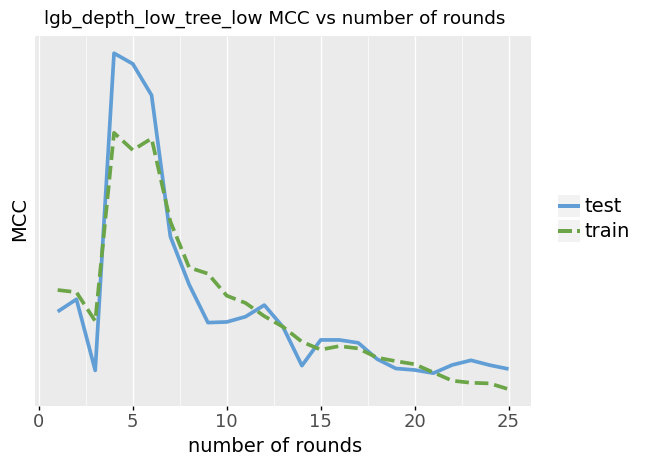

<ggplot: (-9223371895062539528)>

In [8]:
g = u.loss(loss_ = loss_data, plot_title = layer_name + ' MCC vs number of rounds', start = 0, end = 250, gap = 5)
ggsave(file= layer_name + " MCC vs number of rounds.svg", plot = g, width = 10, height = 8, dpi = 500, format = 'svg')
g

# Layer 2 _ lightGBM - 2

In [9]:
layer_name = 'lgb_depth_low_tree_high'
params = best_params_lgb['parameters']
params['var_name'] = layer_name
params['max_depth'] = 5
params['num_iteration'] = 55
params['x'] = x
params['y'] = y
params['te'] = te

In [10]:
model, scores, loss_data, tr_stacking, te_stacking = u.lgb_model(params)
tr_layer2, te_layer2 = u.submit_and_layer_merge(output = output, csv_name = layer_name, te_stacking = te_stacking, tr_stacking = tr_stacking, te = te, scores = scores, tr_layer = tr_layer2, te_layer = te_layer2)
pd.DataFrame(scores)

c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Info] Number of positive: 5503, number of negative: 941494
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.099193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9512
[LightGBM] [Info] Number of data points in the train set: 946997, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005811 -> initscore=-5.142175
[LightGBM] [Info] Start training from score -5.142175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	train's MCC: 0.441848	eval's MCC: 0.437992
Training until validation scores don't improve for 45 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	train's MCC: 0.441848	eval's MCC: 0.437992
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	train's MCC: 0.442978	eval's MCC: 0.445712
[LightGBM] 

c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Info] Number of positive: 5503, number of negative: 941494
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.097142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9509
[LightGBM] [Info] Number of data points in the train set: 946997, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005811 -> initscore=-5.142175
[LightGBM] [Info] Start training from score -5.142175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	train's MCC: 0.437174	eval's MCC: 0.447334
Training until validation scores don't improve for 45 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	train's MCC: 0.437174	eval's MCC: 0.447334
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	train's MCC: 0.440423	eval's MCC: 0.447334
[LightGBM] 

c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Info] Number of positive: 5504, number of negative: 941494
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9520
[LightGBM] [Info] Number of data points in the train set: 946998, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005812 -> initscore=-5.141993
[LightGBM] [Info] Start training from score -5.141993
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	train's MCC: 0.442415	eval's MCC: 0.432774
Training until validation scores don't improve for 45 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	train's MCC: 0.443041	eval's MCC: 0.429276
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	train's MCC: 0.443357	eval's MCC: 0.435218
[LightGBM] 

c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Info] Number of positive: 5503, number of negative: 941495
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.328070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9519
[LightGBM] [Info] Number of data points in the train set: 946998, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005811 -> initscore=-5.142176
[LightGBM] [Info] Start training from score -5.142176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	train's MCC: 0.435412	eval's MCC: 0.463482
Training until validation scores don't improve for 45 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	train's MCC: 0.435412	eval's MCC: 0.463482
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	train's MCC: 0.436919	eval's MCC: 0.46802
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Info] Number of positive: 5503, number of negative: 941495
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.114947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9503
[LightGBM] [Info] Number of data points in the train set: 946998, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005811 -> initscore=-5.142176
[LightGBM] [Info] Start training from score -5.142176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	train's MCC: 0.445444	eval's MCC: 0.426835
Training until validation scores don't improve for 45 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	train's MCC: 0.445444	eval's MCC: 0.426835
[3]	train's MCC: 0.447431	eval's MCC: 0.428809
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	train's

,fold,mcc,g_means,auc_scores,f1_scores,threshold
0,1,0.445712,0.510667,0.630219,0.389371,0.383333
1,2,0.447577,0.524666,0.637425,0.400423,0.383333
2,3,0.440479,0.481602,0.615873,0.363740,0.550000
3,4,0.470679,0.531581,0.641131,0.416265,0.383333
4,5,0.427384,0.495501,0.622580,0.370005,0.341667


c:\Users\Ali.Wu\OneDrive - shl-group.com\Desktop\Bosch line performance\utils.py:442: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
c:\py_venv\tutorial-venv\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 10 x 8 in image.
c:\py_venv\tutorial-venv\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: plotnine-save-9223371895062713660.svg


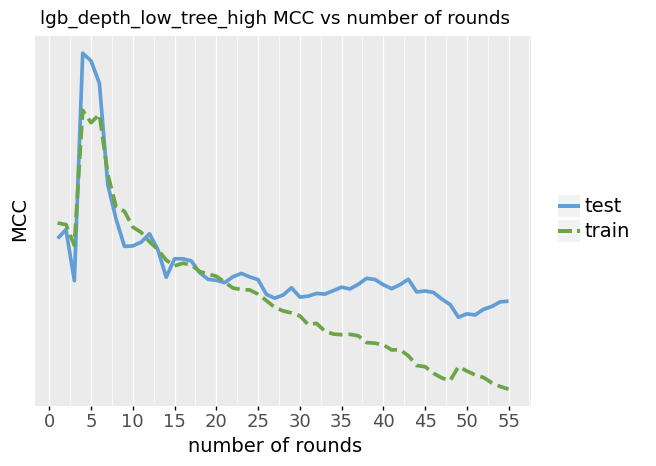

<ggplot: (-9223371895062713660)>

In [11]:
g = u.loss(loss_ = loss_data, plot_title = layer_name + ' MCC vs number of rounds', start = 0, end = 250, gap = 5)
ggsave(file= layer_name + " MCC vs number of rounds.svg", plot = g, width = 10, height = 8, dpi = 500, format = 'svg')
g

# Layer 2 _ lightGBM - 3

In [12]:
layer_name = 'lgb_depth_high_tree_low'
params = best_params_lgb['parameters']
params['var_name'] = layer_name
params['max_depth'] = 30
params['num_iteration'] = 10
params['x'] = x
params['y'] = y
params['te'] = te

In [13]:
model, scores, loss_data, tr_stacking, te_stacking = u.lgb_model(params)
tr_layer2, te_layer2 = u.submit_and_layer_merge(output = output, csv_name = layer_name, te_stacking = te_stacking, tr_stacking = tr_stacking, te = te, scores = scores, tr_layer = tr_layer2, te_layer = te_layer2)
pd.DataFrame(scores)

c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Info] Number of positive: 5503, number of negative: 941494
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.370576 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9512
[LightGBM] [Info] Number of data points in the train set: 946997, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005811 -> initscore=-5.142175
[LightGBM] [Info] Start training from score -5.142175
[1]	train's MCC: 0.441848	eval's MCC: 0.437992
Training until validation scores don't improve for 45 rounds
[2]	train's MCC: 0.441848	eval's MCC: 0.437992
[3]	train's MCC: 0.441848	eval's MCC: 0.437992
[4]	train's MCC: 0.441919	eval's MCC: 0.440337
[5]	train's MCC: 0.444531	eval's MCC: 0.443313
[6]	train's MCC: 0.445574	eval's MCC: 0.445622
[7]	train's MCC: 0.443662	eval's MCC: 0.436921
[8]	train's MCC: 0.445011	eval's MCC: 0.433695
[9]	train's MCC: 0.445776	eval's MCC: 0.434557
[10]	train's MCC: 

c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Info] Number of positive: 5503, number of negative: 941494
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.098049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9509
[LightGBM] [Info] Number of data points in the train set: 946997, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005811 -> initscore=-5.142175
[LightGBM] [Info] Start training from score -5.142175
[1]	train's MCC: 0.437174	eval's MCC: 0.447334
Training until validation scores don't improve for 45 rounds
[2]	train's MCC: 0.437174	eval's MCC: 0.447334
[3]	train's MCC: 0.437174	eval's MCC: 0.447334
[4]	train's MCC: 0.387952	eval's MCC: 0.363901
[5]	train's MCC: 0.390931	eval's MCC: 0.363901
[6]	train's MCC: 0.408166	eval's MCC: 0.394604
[7]	train's MCC: 0.427732	eval's MCC: 0.431087
[8]	train's MCC: 0.438285	eval's MCC: 0.439757
[

c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Info] Number of positive: 5504, number of negative: 941494
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.317543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9520
[LightGBM] [Info] Number of data points in the train set: 946998, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005812 -> initscore=-5.141993
[LightGBM] [Info] Start training from score -5.141993
[1]	train's MCC: 0.442415	eval's MCC: 0.432774
Training until validation scores don't improve for 45 rounds
[2]	train's MCC: 0.443041	eval's MCC: 0.429276
[3]	train's MCC: 0.443357	eval's MCC: 0.435218
[4]	train's MCC: 0.443416	eval's MCC: 0.43414
[5]	train's MCC: 0.445841	eval's MCC: 0.43414
[6]	train's MCC: 0.445761	eval's MCC: 0.43009
[7]	train's MCC: 0.441331	eval's MCC: 0.425952
[8]	train's MCC: 0.445126	eval's MCC: 0.430574
[9]	train's MCC: 0.44409	eval's MCC: 0.430246
[10]	train's MCC: 0.44

c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Info] Number of positive: 5503, number of negative: 941495
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.093871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9519
[LightGBM] [Info] Number of data points in the train set: 946998, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005811 -> initscore=-5.142176
[LightGBM] [Info] Start training from score -5.142176
[1]	train's MCC: 0.435412	eval's MCC: 0.463482
Training until validation scores don't improve for 45 rounds
[2]	train's MCC: 0.435412	eval's MCC: 0.463482
[3]	train's MCC: 0.436919	eval's MCC: 0.46802
[4]	train's MCC: 0.410279	eval's MCC: 0.438903
[5]	train's MCC: 0.436048	eval's MCC: 0.469276
[6]	train's MCC: 0.438186	eval's MCC: 0.470931
[7]	train's MCC: 0.438617	eval's MCC: 0.470427
[8]	train's MCC: 0.438914	eval's MCC: 0.469857
[9

c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Info] Number of positive: 5503, number of negative: 941495
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.349457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9503
[LightGBM] [Info] Number of data points in the train set: 946998, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005811 -> initscore=-5.142176
[LightGBM] [Info] Start training from score -5.142176
[1]	train's MCC: 0.445444	eval's MCC: 0.426835
Training until validation scores don't improve for 45 rounds
[2]	train's MCC: 0.445444	eval's MCC: 0.426835
[3]	train's MCC: 0.447431	eval's MCC: 0.428809
[4]	train's MCC: 0.446154	eval's MCC: 0.427693
[5]	train's MCC: 0.446496	eval's MCC: 0.428716
[6]	train's MCC: 0.447317	eval's MCC: 0.426835
[7]	train's MCC: 0.449758	eval's MCC: 0.428196
[8]	train's MCC: 0.449372	eval's MCC: 0.430399
[9]	train's MCC: 0.450837	eval's MCC: 0.430234
[10]	train's MCC: 

,fold,mcc,g_means,auc_scores,f1_scores,threshold
0,1,0.437872,0.507803,0.628744,0.383784,0.341667
1,2,0.444023,0.517708,0.633810,0.393810,0.383333
2,3,0.430233,0.483088,0.616555,0.361283,0.550000
3,4,0.471694,0.534303,0.642576,0.418753,0.383333
4,5,0.430234,0.502045,0.625831,0.376152,0.383333


c:\Users\Ali.Wu\OneDrive - shl-group.com\Desktop\Bosch line performance\utils.py:442: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
c:\py_venv\tutorial-venv\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 10 x 8 in image.
c:\py_venv\tutorial-venv\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: plotnine-save-9223371895062610872.svg


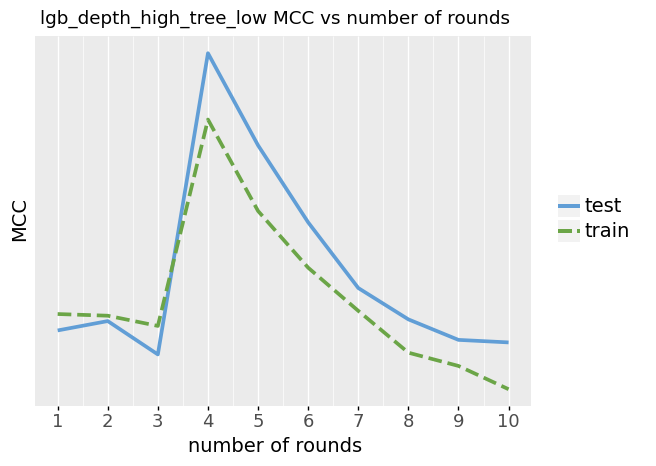

<ggplot: (-9223371895062610872)>

In [14]:
g = u.loss(loss_ = loss_data, plot_title = layer_name + ' MCC vs number of rounds', start = 0, end = 250, gap = 1)
ggsave(file= layer_name + " MCC vs number of rounds.svg", plot = g, width = 10, height = 8, dpi = 500, format = 'svg')
g

# Layer 2 _ lightGBM - 4

In [15]:
layer_name = 'lgb_depth_high_tree_high'
params = best_params_lgb['parameters']
params['var_name'] = layer_name
params['max_depth'] = 30
params['num_iteration'] = 25
params['x'] = x
params['y'] = y
params['te'] = te

In [16]:
model, scores, loss_data, tr_stacking, te_stacking = u.lgb_model(params)
tr_layer2, te_layer2 = u.submit_and_layer_merge(output = output, csv_name = layer_name, te_stacking = te_stacking, tr_stacking = tr_stacking, te = te, scores = scores, tr_layer = tr_layer2, te_layer = te_layer2)
pd.DataFrame(scores)

c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Info] Number of positive: 5503, number of negative: 941494
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.126025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9512
[LightGBM] [Info] Number of data points in the train set: 946997, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005811 -> initscore=-5.142175
[LightGBM] [Info] Start training from score -5.142175
[1]	train's MCC: 0.441848	eval's MCC: 0.437992
Training until validation scores don't improve for 45 rounds
[2]	train's MCC: 0.441848	eval's MCC: 0.437992
[3]	train's MCC: 0.441848	eval's MCC: 0.437992
[4]	train's MCC: 0.441919	eval's MCC: 0.440337
[5]	train's MCC: 0.444531	eval's MCC: 0.443313
[6]	train's MCC: 0.445574	eval's MCC: 0.445622
[7]	train's MCC: 0.443662	eval's MCC: 0.436921
[8]	train's MCC: 0.445011	eval's MCC: 0.433695
[

c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Info] Number of positive: 5503, number of negative: 941494
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.095452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9509
[LightGBM] [Info] Number of data points in the train set: 946997, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005811 -> initscore=-5.142175
[LightGBM] [Info] Start training from score -5.142175
[1]	train's MCC: 0.437174	eval's MCC: 0.447334
Training until validation scores don't improve for 45 rounds
[2]	train's MCC: 0.437174	eval's MCC: 0.447334
[3]	train's MCC: 0.437174	eval's MCC: 0.447334
[4]	train's MCC: 0.387952	eval's MCC: 0.363901
[5]	train's MCC: 0.390931	eval's MCC: 0.363901
[6]	train's MCC: 0.408166	eval's MCC: 0.394604
[7]	train's MCC: 0.427732	eval's MCC: 0.431087
[8]	train's MCC: 0.438285	eval's MCC: 0.439757
[

c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Info] Number of positive: 5504, number of negative: 941494
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.304274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9520
[LightGBM] [Info] Number of data points in the train set: 946998, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005812 -> initscore=-5.141993
[LightGBM] [Info] Start training from score -5.141993
[1]	train's MCC: 0.442415	eval's MCC: 0.432774
Training until validation scores don't improve for 45 rounds
[2]	train's MCC: 0.443041	eval's MCC: 0.429276
[3]	train's MCC: 0.443357	eval's MCC: 0.435218
[4]	train's MCC: 0.443416	eval's MCC: 0.43414
[5]	train's MCC: 0.445841	eval's MCC: 0.43414
[6]	train's MCC: 0.445761	eval's MCC: 0.43009
[7]	train's MCC: 0.441331	eval's MCC: 0.425952
[8]	train's MCC: 0.445126	eval's MCC: 0.430574
[9]	train's MCC: 0.44409	eval's MCC: 0.430246
[10]	train's MCC: 0.44

c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Info] Number of positive: 5503, number of negative: 941495
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.107234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9519
[LightGBM] [Info] Number of data points in the train set: 946998, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005811 -> initscore=-5.142176
[LightGBM] [Info] Start training from score -5.142176
[1]	train's MCC: 0.435412	eval's MCC: 0.463482
Training until validation scores don't improve for 45 rounds
[2]	train's MCC: 0.435412	eval's MCC: 0.463482
[3]	train's MCC: 0.436919	eval's MCC: 0.46802
[4]	train's MCC: 0.410279	eval's MCC: 0.438903
[5]	train's MCC: 0.436048	eval's MCC: 0.469276
[6]	train's MCC: 0.438186	eval's MCC: 0.470931
[7]	train's MCC: 0.438617	eval's MCC: 0.470427
[8]	train's MCC: 0.438914	eval's MCC: 0.469857
[9

c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteration` in params. Will use it instead of argument
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
c:\py_venv\tutorial-venv\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.


[LightGBM] [Info] Number of positive: 5503, number of negative: 941495
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.101511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9503
[LightGBM] [Info] Number of data points in the train set: 946998, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005811 -> initscore=-5.142176
[LightGBM] [Info] Start training from score -5.142176
[1]	train's MCC: 0.445444	eval's MCC: 0.426835
Training until validation scores don't improve for 45 rounds
[2]	train's MCC: 0.445444	eval's MCC: 0.426835
[3]	train's MCC: 0.447431	eval's MCC: 0.428809
[4]	train's MCC: 0.446154	eval's MCC: 0.427693
[5]	train's MCC: 0.446496	eval's MCC: 0.428716
[6]	train's MCC: 0.447317	eval's MCC: 0.426835
[7]	train's MCC: 0.449758	eval's MCC: 0.428196
[8]	train's MCC: 0.449372	eval's MCC: 0.430399
[

,fold,mcc,g_means,auc_scores,f1_scores,threshold
0,1,0.444329,0.526036,0.638128,0.399790,0.300000
1,2,0.448641,0.526048,0.638149,0.401899,0.383333
2,3,0.436184,0.486094,0.618020,0.365991,0.508333
3,4,0.469943,0.530897,0.640767,0.415418,0.383333
4,5,0.433269,0.475351,0.612879,0.355835,0.466667


c:\Users\Ali.Wu\OneDrive - shl-group.com\Desktop\Bosch line performance\utils.py:442: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
c:\py_venv\tutorial-venv\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning: Saving 10 x 8 in image.
c:\py_venv\tutorial-venv\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: plotnine-save-9223371895062701496.svg


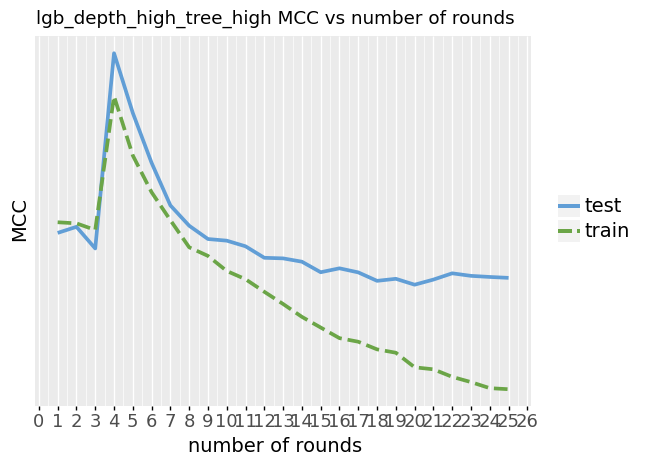

<ggplot: (-9223371895062701496)>

In [17]:
g = u.loss(loss_ = loss_data, plot_title = layer_name + ' MCC vs number of rounds', start = 0, end = 250, gap = 1)
ggsave(file= layer_name + " MCC vs number of rounds.svg", plot = g, width = 10, height = 8, dpi = 500, format = 'svg')
g

# Output

In [18]:
tr_layer2.to_csv(stacking_layer2 + 'train_layer2.csv', index = 0)
te_layer2.to_csv(stacking_layer2 + 'test_layer2.csv', index = 0)

In [19]:
tr_layer2.head()

,index,Id,L1_S24_F1523,L1_S24_F1525,L1_S24_F1582,L1_S24_F1585,L2_S26_F3038,L2_S26_F3099,L3_S32_F3851,L3_S32_F3854,...,xgb_depth_medium_tree_low,xgb_depth_medium_tree_medium,xgb_depth_medium_tree_high,xgb_depth_high_tree_low,xgb_depth_high_tree_medium,xgb_depth_high_tree_high,lgb_depth_low_tree_low,lgb_depth_low_tree_high,lgb_depth_high_tree_low,lgb_depth_high_tree_high
0,0,4,0,0,0,0,0,0,0,0,...,0.067094,0.005995,0.001552,0.067097,0.006533,0.001162,0.001721,0.001366,0.002427,0.001732
1,1,6,0,0,0,0,0,0,0,0,...,0.067026,0.006619,0.003662,0.067030,0.006765,0.002759,0.003299,0.002546,0.003469,0.003527
2,2,7,0,0,0,0,0,0,0,0,...,0.066965,0.007260,0.003800,0.066967,0.008755,0.002348,0.002736,0.002160,0.003508,0.002970
3,3,9,0,0,0,0,0,0,0,0,...,0.066955,0.005984,0.000796,0.066982,0.005985,0.000723,0.000742,0.000290,0.002451,0.000818
4,4,11,0,0,0,0,0,0,0,0,...,0.093010,0.041358,0.039418,0.100139,0.028806,0.024032,0.024498,0.017744,0.018089,0.022893


In [20]:
te_layer2.head()

,Id,L1_S24_F1523,L1_S24_F1525,L1_S24_F1582,L1_S24_F1585,L2_S26_F3038,L2_S26_F3099,L3_S32_F3851,L3_S32_F3854,L3_S35_F3902,...,xgb_depth_medium_tree_low,xgb_depth_medium_tree_medium,xgb_depth_medium_tree_high,xgb_depth_high_tree_low,xgb_depth_high_tree_medium,xgb_depth_high_tree_high,lgb_depth_low_tree_low,lgb_depth_low_tree_high,lgb_depth_high_tree_low,lgb_depth_high_tree_high
0,1,1,3,0,0,0,0,0,0,0,...,0.067417,0.007327,0.002224,0.067422,0.007828,0.002920,0.002038,0.002447,0.003132,0.002137
1,2,0,0,0,0,0,0,0,0,0,...,0.066982,0.006125,0.000945,0.066992,0.006170,0.001005,0.000803,0.001255,0.002312,0.000843
2,3,1,2,0,0,1,2,0,0,0,...,0.067434,0.007465,0.002570,0.067441,0.008135,0.003432,0.002496,0.002368,0.003239,0.002371
3,5,0,0,0,0,1,1,0,0,0,...,0.067197,0.007262,0.001854,0.067190,0.008850,0.002380,0.002016,0.001985,0.002982,0.001909
4,8,1,2,0,0,1,2,0,0,0,...,0.067417,0.007224,0.002487,0.067422,0.008285,0.003216,0.002275,0.002291,0.003146,0.002119
